In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

city_df.head()
ride_df.head()

# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


## Bubble Plot of Ride Sharing Data

True


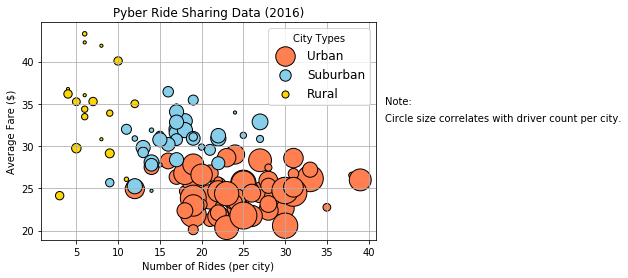

In [13]:
# Obtain the x and y coordinates for each of the three city types

urban_group_attributes =city_ride_df[["city", "fare","ride_id","type","driver_count"]]
urban_df = urban_group_attributes.loc[urban_group_attributes["type"] == "Urban", :]
urban_df = urban_df.groupby(["city","type"])
urban_df.head()

urban_Average_Fare = urban_df['fare'].mean()
urban_Number_of_Rides = urban_df['ride_id'].nunique()
urban_driver_count = urban_df['driver_count'].max()

urban_summary = pd.DataFrame({"Urban Fare": urban_Average_Fare,
                           "Urban Rides": urban_Number_of_Rides,
                             "Urban Driver": urban_driver_count})
                                                          
sub_group_attributes =city_ride_df[["city", "fare","ride_id","type","driver_count"]]
suburban_df = sub_group_attributes.loc[sub_group_attributes["type"] == "Suburban", :]
suburban_df = suburban_df.groupby(["city","type"])
suburban_df.head()

sub_Average_Fare = suburban_df['fare'].mean()
sub_Number_of_Rides = suburban_df['ride_id'].nunique()
sub_driver_count = suburban_df['driver_count'].max()

suburban_summary = pd.DataFrame({"Sub Fare": sub_Average_Fare,
                          "Sub Rides": sub_Number_of_Rides,
                                "Sub Driver": sub_driver_count})


rural_group_attributes =city_ride_df[["city", "fare","ride_id","type","driver_count"]]
rural_df = rural_group_attributes.loc[sub_group_attributes["type"] == "Rural", :]
rural_df = rural_df.groupby(["city","type"])
rural_df.head()

rural_Average_Fare = rural_df['fare'].mean()
rural_Number_of_Rides = rural_df['ride_id'].nunique()
rural_driver_count = rural_df['driver_count'].max()

rural_summary = pd.DataFrame({"Rural Fare": rural_Average_Fare,
                          "Rural Rides": rural_Number_of_Rides,
                             "Rural Driver": rural_driver_count})

# Build the scatter plots for each city types

ax1 = urban_summary.plot(kind='scatter', y='Urban Fare', x='Urban Rides', color='coral', label="Urban",s=(urban_summary['Urban Driver']*10),edgecolor='Black')     
ax2 = suburban_summary.plot(kind='scatter', y='Sub Fare', x='Sub Rides', color='skyblue', ax=ax1, label="Suburban", s=(suburban_summary['Sub Driver']*10),edgecolor='Black')    
ax3 = rural_summary.plot(kind='scatter', y='Rural Fare', x='Rural Rides', color='gold', ax=ax1, label = "Rural", s=(rural_summary['Rural Driver']*10),edgecolor='Black')

print(ax1 == ax2== ax3 ) 

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")


# Set the xlabel and ylabel using class methods
ax3.set_ylabel("Average Fare ($)")
ax3.set_xlabel("Number of Rides (per city)")

# Create a legend
plt.legend(title='City Types',loc=1, prop={'size': 12})

# Incorporate a text label regarding circle size
textstr = 'Note: Circle size coorolates with driver count per city.'

# print textstr
ax3.text(42, 35, "Note:")
ax3.text(42, 33, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig('Pyber_Ride_Sharing_Data.png', bbox_inches='tight')

# Show plot
plt.show()


## Total Fares by City Type

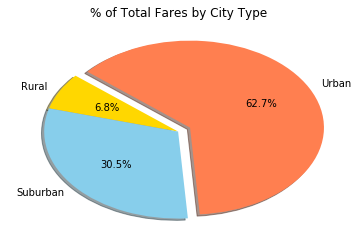

In [6]:
# Calculate Type Percents
city_type_attributes =city_ride_df[["fare","type"]]
city_type_df = city_type_attributes.groupby(["type"])
city_type_df.head()

total_fare_by_city_type = city_type_df['fare'].sum()
Percentage_of_Total = (city_type_df['fare'].sum()/total_fare_by_city_type.sum()*100)

total_by_city_type_summary = pd.DataFrame({"total_fare_by_city_type": total_fare_by_city_type,
                                          "Percent":Percentage_of_Total})

total_by_city_type_summary.head()

# Build Pie Chart

explode = (0.0,0.00,.1)

plt.title("% of Total Fares by City Type")

colors = ['gold','skyblue','coral']
labels =['Rural','Suburban','Urban']

plt.pie (Percentage_of_Total, explode=explode, startangle=140, shadow=True,autopct='%1.1f%%',colors=colors, labels=labels)

# Save Figure
plt.savefig('Percent_of_Total_Fares_by_City_Type.png', bbox_inches='tight')

plt.show()

## Total Rides by City Type

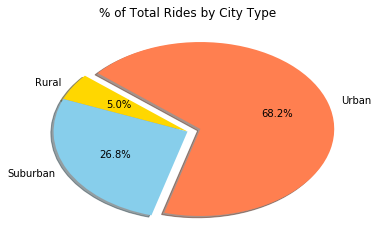

In [8]:
# Calculate Type Percents
city_type_attributes =city_ride_df[["ride_id","type"]]
city_type_df = city_type_attributes.groupby(["type"])
city_type_df.head()

total_ride_by_city_type = city_type_df['ride_id'].sum()
Percentage_ride_of_Total = (city_type_df['ride_id'].sum()/total_fare_by_city_type.sum()*100)

total_rides_by_city_type_summary = pd.DataFrame({"total_ride_by_city_type": total_ride_by_city_type,
                                          "Percent":Percentage_ride_of_Total})

total_rides_by_city_type_summary.head()

# Build Pie Chart

explode = (0.0,0.00,.1)

plt.title("% of Total Rides by City Type")

colors = ['gold','skyblue','coral']
labels =['Rural','Suburban','Urban']

plt.pie (Percentage_ride_of_Total, explode=explode, startangle=140, shadow=True,autopct='%1.1f%%',colors=colors, labels=labels)

# Save Figure
plt.savefig('Percent_of_Total_Rides_by_City_Type.png', bbox_inches='tight')

plt.show()

## Total Drivers by City Type

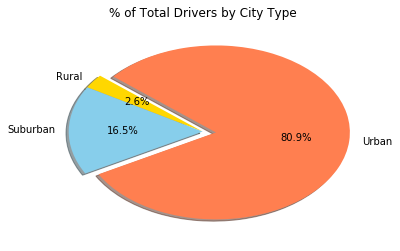

In [7]:
# Calculate Type Percents
driver_type_attributes =city_df[["driver_count","type"]]
driver_type_df = driver_type_attributes.groupby(["type"])
driver_type_df.head()

all_driver_count = driver_type_df['driver_count'].sum()
Percentage_driver_of_Total = (all_driver_count/all_driver_count.sum()*100)

total_drivers_by_city_type_summary = pd.DataFrame({"total_driver_by_city_type": all_driver_count,
                                          "Percent":Percentage_driver_of_Total})

total_drivers_by_city_type_summary.head()

# Build Pie Chart

explode = (0.0,0.00,.1)

plt.title("% of Total Drivers by City Type")

colors = ['gold','skyblue','coral']
labels =['Rural','Suburban','Urban']

plt.pie (Percentage_driver_of_Total, explode=explode, startangle=140, shadow=True,autopct='%1.1f%%',colors=colors, labels=labels)

# Save Figure
plt.savefig('Percent_of_Total_Drivers_by_City_Type.png', bbox_inches='tight')

plt.show()
